# objectives - get basic model tested after variance inflation factor used for feature selection

- check feature importance afterwards, 

- set up for advanced model tuning 

In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import seaborn as sns

In [2]:
df = pd.read_csv('../../data/model/final_df.csv')
df.rename(columns={"Asian or Asian/Pacific Islander - female [Public School] 2020-21":'APA_F',
                  'Current\nExpense Per ADA':'Current_Expense_per_ADA'}
       ,inplace=True)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52665 entries, 0 to 52664
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Mean Scale Score                             52665 non-null  float64
 1   Total Tested with Scores at Reporting Level  52665 non-null  float64
 2   Demographic Name                             52665 non-null  object 
 3   Student Group                                52665 non-null  object 
 4   District Type                                52665 non-null  object 
 5   Test ID                                      52665 non-null  object 
 6   School Type                                  52665 non-null  object 
 7   Education_type                               52665 non-null  object 
 8   Charter_School                               52665 non-null  int64  
 9   Low Grade                                    52665 non-null  object 
 10

In [16]:
df.head()

,Mean Scale Score,Total Tested with Scores at Reporting Level,Demographic Name,Student Group,District Type,Test ID,School Type,Education_type,Charter_School,Low Grade,...,Pupil/Teacher-Ratio,Hispanic_Female,Black_or_AA_F,APA_F,Avg_21,Average Salary Paid,Current_Expense_per_ADA,est_num_u17_pov,Grocery_3mile,Grocery_dist
0,2579.7,106.0,All Students,All Students,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,"5,4,3,2,1",...,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
1,2582.4,56.0,Male,Gender,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,"5,4,3,2,1",...,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
2,2577.0,50.0,Female,Gender,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,"5,4,3,2,1",...,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
3,2600.2,91.0,IFEP and EO (Initial fluent English proficient...,English-Language Fluency,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,"5,4,3,2,1",...,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0
4,2614.4,24.0,RFEP (Reclassified fluent English proficient),English-Language Fluency,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,"5,4,3,2,1",...,20.652848,194.364754,32.206967,361.873975,754920.0,85586.372299,13998.450902,3044.345812,50.0,1372.0


In [3]:
## add random variable to compare variable inportance too 

In [4]:
df['random'] = np.random.random(size = len(df))

In [5]:
df.columns

Index(['Mean Scale Score', 'Total Tested with Scores at Reporting Level',
       'Demographic Name', 'Student Group', 'District Type', 'Test ID',
       'School Type', 'Education_type', 'Charter_School', 'Low Grade',
       'Free_Meal_count', 'Latitude', 'FTE_Teachers', 'Pupil/Teacher-Ratio',
       'Hispanic_Female', 'Black_or_AA_F', 'APA_F', 'Avg_21',
       'Average Salary Paid', 'Current_Expense_per_ADA', 'est_num_u17_pov',
       'Grocery_3mile', 'Grocery_dist', 'random'],
      dtype='object')

## Decrease categories for one hote encoding 

In [12]:
df['Low Grade'] = df['Low Grade'].replace({'P':'K','5,4,3,2,1':'6',
                                           '11 or 8':'11,10,8',
                                          '10':'11,10,8'})

In [13]:
df['Low Grade'].value_counts()

9          42218
K           5085
6           2536
7           1941
11,10,8      885
Name: Low Grade, dtype: int64

In [22]:
df['Low Grade'].unique().tolist()

['6', '9', 'K', '7', '11,10,8']

## One hot encode categotical columns 

In [28]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='error',drop='first')


enc_df = pd.DataFrame(enc.fit_transform(df[['Low Grade']]).toarray(),
                    )
enc_df.columns =   enc.get_feature_names_out(['Low Grade'])
enc_df
# # merge with main df bridge_df on key values
df = df.join(enc_df)
df.drop('Low Grade',inplace=True,axis=1)
# df.head()

,Mean Scale Score,Total Tested with Scores at Reporting Level,Demographic Name,Student Group,District Type,Test ID,School Type,Education_type,Charter_School,Free_Meal_count,...,Average Salary Paid,Current_Expense_per_ADA,est_num_u17_pov,Grocery_3mile,Grocery_dist,random,Low Grade_6,Low Grade_7,Low Grade_9,Low Grade_K
0,2579.7,106.0,All Students,All Students,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,230.0,...,85586.372299,13998.450902,3044.345812,50.0,1372.0,0.134030,1.0,0.0,0.0,0.0
1,2582.4,56.0,Male,Gender,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,230.0,...,85586.372299,13998.450902,3044.345812,50.0,1372.0,0.521505,1.0,0.0,0.0,0.0
2,2577.0,50.0,Female,Gender,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,230.0,...,85586.372299,13998.450902,3044.345812,50.0,1372.0,0.476876,1.0,0.0,0.0,0.0
3,2600.2,91.0,IFEP and EO (Initial fluent English proficient...,English-Language Fluency,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,230.0,...,85586.372299,13998.450902,3044.345812,50.0,1372.0,0.266600,1.0,0.0,0.0,0.0
4,2614.4,24.0,RFEP (Reclassified fluent English proficient),English-Language Fluency,County Office of Education (COE),English Language Arts/Literacy,K-12 Schools (Public),Traditional,1,230.0,...,85586.372299,13998.450902,3044.345812,50.0,1372.0,0.233593,1.0,0.0,0.0,0.0


In [72]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='error',drop='first')


enc_df = pd.DataFrame(enc.fit_transform(df[['Test ID']]).toarray(),
                    )
enc_df.columns =   enc.get_feature_names_out(['Test ID'])
enc_df
# # merge with main df bridge_df on key values
df = df.join(enc_df)
df.drop('Test ID',inplace=True,axis=1)
# df.head()

,Mean Scale Score,Total Tested with Scores at Reporting Level,Demographic Name,Student Group,District Type,School Type,Education_type,Charter_School,Free_Meal_count,Latitude,...,Current_Expense_per_ADA,est_num_u17_pov,Grocery_3mile,Grocery_dist,random,Low Grade_6,Low Grade_7,Low Grade_9,Low Grade_K,Test ID_Mathematics
0,2579.7,106.0,All Students,All Students,County Office of Education (COE),K-12 Schools (Public),Traditional,1,230.0,37.657668,...,13998.450902,3044.345812,50.0,1372.0,0.134030,1.0,0.0,0.0,0.0,0.0
1,2582.4,56.0,Male,Gender,County Office of Education (COE),K-12 Schools (Public),Traditional,1,230.0,37.657668,...,13998.450902,3044.345812,50.0,1372.0,0.521505,1.0,0.0,0.0,0.0,0.0
2,2577.0,50.0,Female,Gender,County Office of Education (COE),K-12 Schools (Public),Traditional,1,230.0,37.657668,...,13998.450902,3044.345812,50.0,1372.0,0.476876,1.0,0.0,0.0,0.0,0.0
3,2600.2,91.0,IFEP and EO (Initial fluent English proficient...,English-Language Fluency,County Office of Education (COE),K-12 Schools (Public),Traditional,1,230.0,37.657668,...,13998.450902,3044.345812,50.0,1372.0,0.266600,1.0,0.0,0.0,0.0,0.0
4,2614.4,24.0,RFEP (Reclassified fluent English proficient),English-Language Fluency,County Office of Education (COE),K-12 Schools (Public),Traditional,1,230.0,37.657668,...,13998.450902,3044.345812,50.0,1372.0,0.233593,1.0,0.0,0.0,0.0,0.0


In [90]:
df['Demographic Name'].value_counts()

Hispanic or Latino                                                  5238
White                                                               3078
All Students                                                        2556
Not armed forces family member                                      2555
Not migrant education                                               2552
Not homeless                                                        2529
IFEP and EO (Initial fluent English proficient and English only)    2501
No reported disabilities                                            2485
Economically disadvantaged                                          2247
Male                                                                2236
EO (English only)                                                   2178
Female                                                              2112
Ever�EL                                                             1924
Not economically disadvantaged                     

In [91]:
enc = OneHotEncoder(handle_unknown='error',drop='first')


enc_df = pd.DataFrame(enc.fit_transform(df[['Demographic Name']]).toarray(),
                    )
enc_df.columns =   enc.get_feature_names_out(['Demographic Name'])
enc_df
# # merge with main df bridge_df on key values
df = df.join(enc_df)
df.drop('Demographic Name',inplace=True,axis=1)

In [92]:
df.shape

(52665, 56)

In [94]:
 X_train, X_test, y_train, y_test = train_test_split(  df.drop(columns=['Mean Scale Score',
                                                        'Student Group', 'District Type', 
       'School Type', 'Education_type']),df['Mean Scale Score'] ,
                                                     test_size=0.2, random_state=42)
    
    

In [96]:
#  X_train.dtypes

In [97]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [98]:
lm = LinearRegression().fit(X_tr_scaled,y_train)

In [99]:
y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [100]:
from sklearn.metrics import r2_score

In [101]:
r2_score(y_train,y_tr_pred)

0.5929289174900928

In [102]:
r2_score(y_test,y_te_pred)

0.5891469735104093

In [103]:
rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

             

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [104]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test, y_test)))


R^2 Training Score: 0.99 
OOB Score: 0.92 
R^2 Validation Score: 0.93


In [105]:
y_te_rf_pred=rf.predict(X_test)

In [106]:
r2_score(y_test,y_te_rf_pred)

0.9254226267330081

## over fitting with OOB and validation much lower than training 

In [124]:
# https://github.com/erykml/medium_articles/blob/master/Machine%20Learning/feature_importance.ipynb

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    fig ,ax = plt.subplots(figsize=(12,12))
    fig = sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)
    sns.despine()

In [126]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp[:20]

,feature,feature_importance
0,APA_F,0.196876
1,Pupil/Teacher-Ratio,0.127553
2,Avg_21,0.076898
3,Hispanic_Female,0.059262
4,Test ID_Mathematics,0.054787
5,Demographic Name_Reported disabilities,0.047780
6,Free_Meal_count,0.046168
7,FTE_Teachers,0.041287
8,Demographic Name_EL (English learner),0.036597
9,Demographic Name_ELs enrolled 12 months or more,0.036186


/Users/robertrustia/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


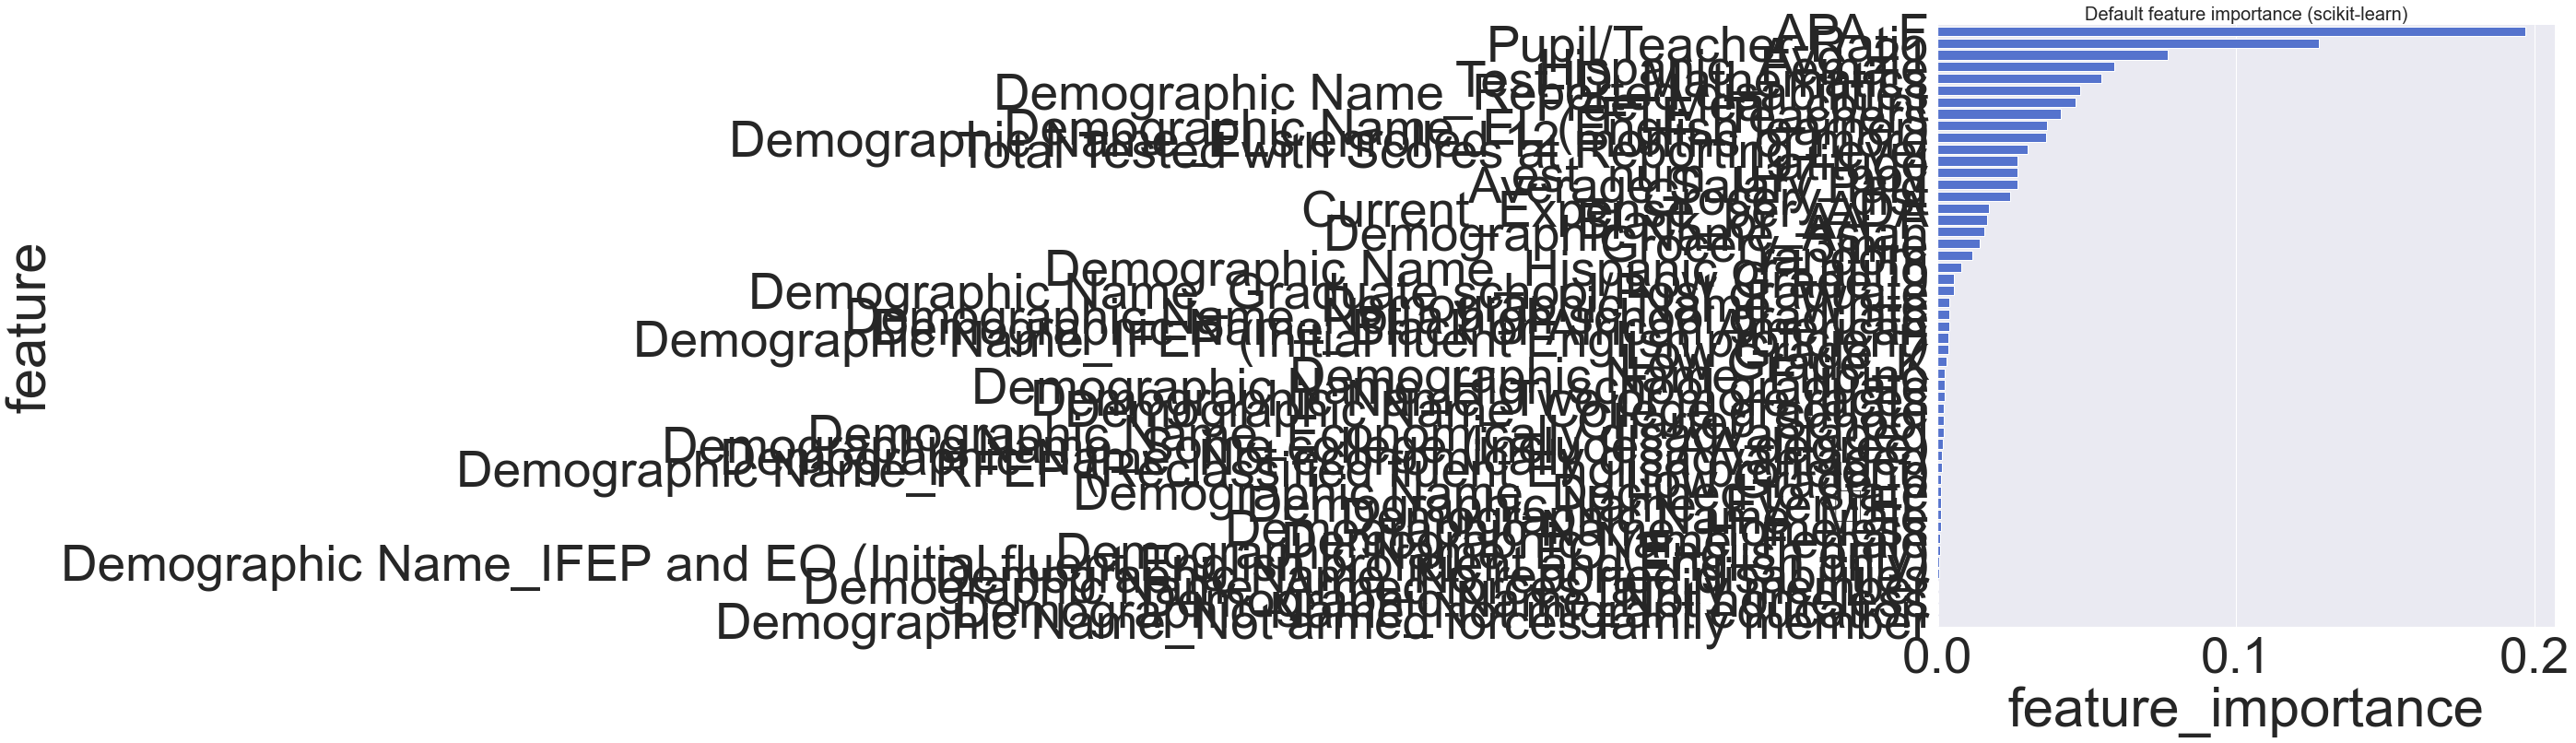

In [125]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

## Without any cateorical features asain/ pacific islander population has the greatest feature inportance. Total students tested at level and puupul teacher ratio are the only other features about the ranom feature added. 

